# Exercise 02


## Time Series Analysis
The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository.
The project must be carried out in the groups assigned in class.
Use clear and rigorous procedures.
Due date: July 11, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)


02.1 Download and explore one series from Google Trends
In your analysis, be sure to answer:

- Is the time series stationary?
- Construct and plot the trend component of the time series
- Construct and plot the seasonal component of the time series
- Is the detrended time series stationary?
- Construct a plot to analyze the autocorrelation

# Solution: 

Andres Felipe Díaz Méndez - 201924178

Arvid Tenganá Hurtado - 201527819

Juan David Barreto Pérez- 202020148

Juan Felipe Martínez Ramos - 201113765

Luis Miguel Torres Aponte - 202022939

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

df = pd.read_csv(r'C:\Users\EC5791h\Downloads\multiTimeline.csv')
df = df[['Semana','Taylor Swift: (Estados Unidos)']]
df.head()

In [55]:
df.index = df['Semana']
df = df.drop('Semana', axis = 1)

<AxesSubplot:xlabel='Semana'>

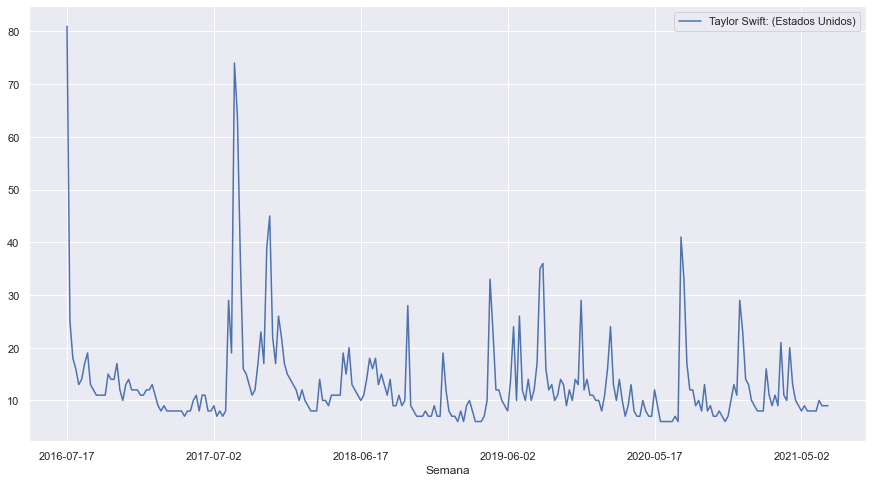

In [56]:
sns.set(rc={'figure.figsize':(15, 8)})
df.plot()

- Is the time series stationary?


In [57]:
from statsmodels.tsa.stattools import adfuller
def ts(rho, periods=200):
    ts = df['Taylor Swift: (Estados Unidos)']
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    return ts
ts1 = ts(rho=0)
ts1.plot()
result = adfuller(ts1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Teniendo un p valor de 0.000 se rechaza la hipótesis nula, por lo tanto, la serie semanal es estacionaria.

- Construct and plot the trend component of the time series


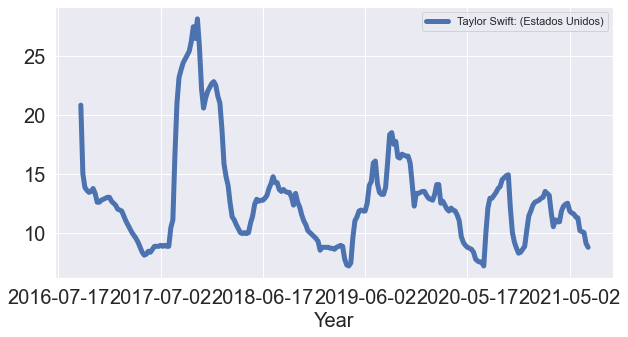

In [79]:
se = df[['Taylor Swift: (Estados Unidos)']]
se.rolling(12).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

- Construct and plot the seasonal component of the time series


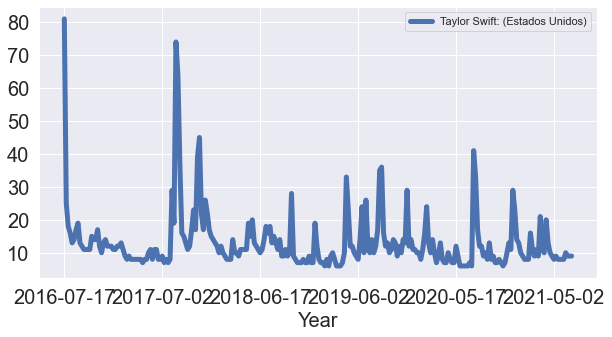

In [65]:
se.plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

- Is the detrended time series stationary?


ADF Statistic: -8.799882
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


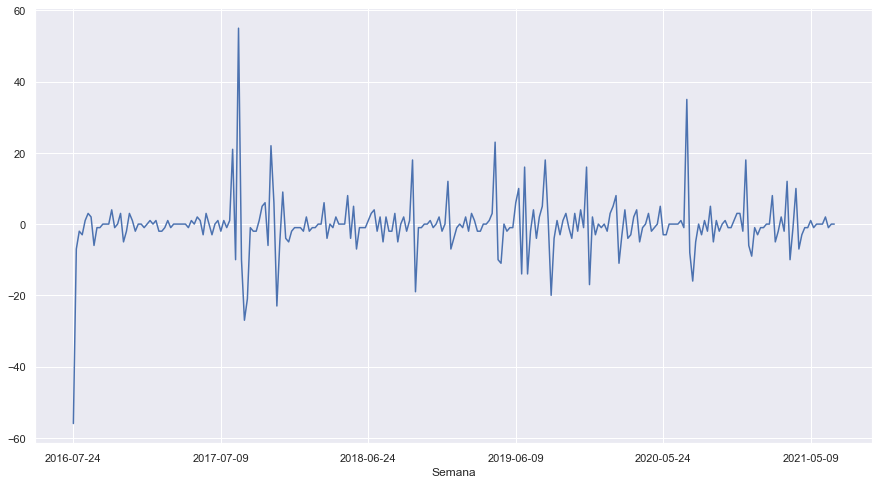

In [77]:
from statsmodels.tsa.stattools import adfuller
def ts(rho, periods=200):
    ts = se.diff().dropna()['Taylor Swift: (Estados Unidos)']
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    return ts
ts1 = ts(rho=0)
ts1.plot()
result = adfuller(ts1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

La prueba de Dickey Fuller muestra que la serie sin tendencia es estacionaria, rechazando la hipótesis nula de no estacionariedad con un valor p de 0.00


- Construct a plot to analyze the autocorrelation

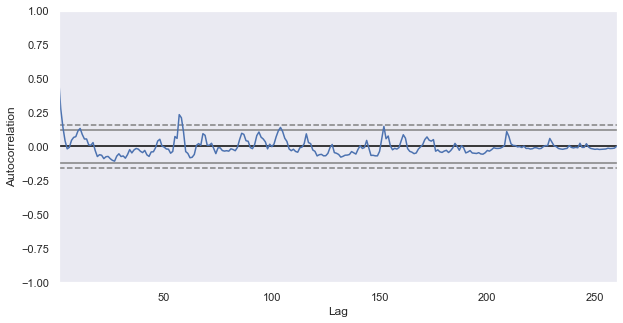

In [66]:
plt.figure(figsize=(10,5))
pd.plotting.autocorrelation_plot(se);

Se espera ver un pico en la correlación en la semana 56 teniendo en cuenta la periodicidad semanal. La serie de tiempo se correlaciona consigo misma cada 56 semanas.